Avaliação - Unidade 02
===

Identificação dos alunos (nome completo): Ailson Forte dos Santos e Ana Paula Lopes de Souza

- Este trabalho irá compor 40% da segunda unidade.
- Grupo de até dois alunos.
- Os alunos deverão enviar (apenas um por grupo) através do Sigaa, o notebook e os datasets gerados na avaliação em um arquivo compactado (.zip). 
- Todas as respostas devem ser realizadas através de código python e os resultados explicados em estilo markdown
- As informações (datasets) necessárias para resolução dos problemas podem ser encontradas em http://dados.ufrn.br/group/ensino


1. (1 ponto) Quantas e quais disciplinas com código IMD foram consolidadas em 2017.1? 
**Dica:** 
>```python
df[df['A'].str.contains("hello")]
```
2. (3 pontos) Realize um estudo envolvendo as propriedades de **assimétria** e **curtose** para as turmas IMD0033 (probabilidade) consolidadas em 2017.1. Utilize gráficos e explique os resultados. Reforce também os horários das disciplinas nos resultados. 
3. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos que descrevam as distribuições estatísticas (utilizar as funções **facetgrid** e **map**) de todas as turmas IMD0030 (Linguagem de Programação I) consolidas em 2017.1. Na análise, assuma como referência as médias finais e a situação dos alunos. 
4. (3 pontos) Utilize a biblioteca seaborn para traçar gráficos de histograma referente as médias finais de todas as turmas IMD0029 (Estrutura de dados I) consolidadas em 2017.1. Incremente nos gráficos linhas que descrevam a média e mediana da distribuição. 

In [2]:
import pandas as pd

turmas = pd.read_csv("turmas-2017.1.csv", sep = ";")
turmas_imd = turmas[turmas['codigo'].str.contains("IMD")]
turmas_imd_cons = turmas_imd[turmas_imd['situacao_turma'].str.contains("CONSOLIDADA")]
turmas_imd_cons = turmas_imd_cons[~turmas_imd_cons.duplicated('id_turma')]
print('1. Foram consolidadas ' + str(len(turmas_imd_cons)) + ' turmas das seguintes disciplinas:')
print(turmas_imd_cons['codigo'].unique())

1. Foram consolidadas 93 turmas das seguintes disciplinas:
['IMD0019' 'IMD0017' 'IMD0018' 'IMD0020' 'IMD0012.0' 'IMD0012.1' 'IMD0024'
 'IMD0027' 'IMD0028' 'IMD0034' 'IMD0029' 'IMD0030' 'IMD0033' 'IMD0038'
 'IMD0039' 'IMD0040' 'IMD0041' 'IMD0105' 'IMD0308' 'IMD0319' 'IMD0322'
 'IMD0323' 'IMD0324' 'IMD0328' 'IMD0403' 'IMD0405' 'IMD0408' 'IMD0409'
 'IMD0414' 'IMD0415' 'IMD0423' 'IMD0505' 'IMD0506' 'IMD0512' 'IMD0517'
 'IMD0524' 'IMD0701' 'IMD0705' 'IMD0822' 'IMD0521' 'IMD0043' 'IMD0110'
 'IMD0709' 'IMD0725' 'IMD0271' 'IMD0707' 'IMD0708' 'IMD0086' 'IMD0081'
 'IMD0079' 'IMD0090' 'IMD0082']


Valores - Curtose 
Turma 1: -1.00 
Turma 2: -0.92
Notamos que há um 'achatamento' maior na turma 2.
Isso é normal pois podemos ver que há mais reprovações nela que há na turma 1.

Valores - Assimetria 
Turma 1: -0.26 
Turma 2: 0.19
Como os valores de assimetria são próximos de zero, podemos dizer que a distribuição das
notas se dá de forma 'centralizada' com relação a média



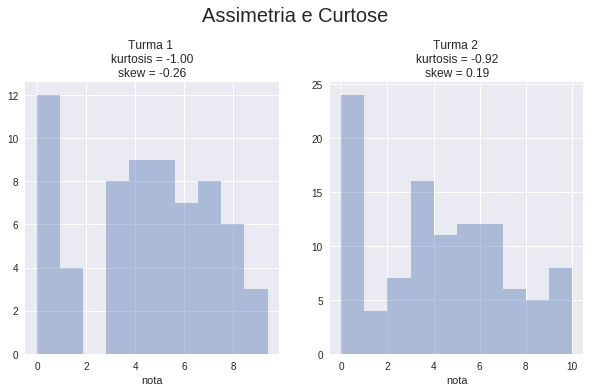

In [27]:
## 2
import matplotlib.pyplot as plt
import seaborn as sns
#Assimetria
from scipy.stats import skew
#Curtose
from scipy.stats import kurtosis

matricula_comp = pd.read_csv("matricula-componente-20171.csv", ";")

fig, (ax1, ax2) = plt.subplots(figsize=(10,5), ncols=2, nrows=1)

probabilidade = turmas_imd_cons[turmas_imd_cons['codigo'].str.contains("IMD0033")]
id_probabilidade = list(probabilidade['id_turma'])

matricula_comp_id_turma1 = matricula_comp[matricula_comp['id_turma'] == id_probabilidade[0]]
matricula_comp_id_turma2 = matricula_comp[matricula_comp['id_turma'] == id_probabilidade[1]]

turma1 = matricula_comp_id_turma1.dropna()
turma2 = matricula_comp_id_turma2.dropna()

assimetria_turma1 = skew(turma1['nota'])
curtose_turma1 = kurtosis(turma1['nota'])

assimetria_turma2 = skew(turma2['nota'])
curtose_turma2 = kurtosis(turma2['nota'])

# main title
plt.suptitle("Assimetria e Curtose", fontsize=20, y = 1.09)

### Titles of subplots
ax1.set_title("Turma 1 \nkurtosis = %.2f"%curtose_turma1 + "\n" +
              "skew = %.2f"%assimetria_turma1, fontsize=12)
ax2.set_title("Turma 2 \nkurtosis = %.2f"%curtose_turma2 + "\n" +
              "skew = %.2f"%assimetria_turma2, fontsize=12)

sns.distplot(turma1['nota'], kde = False, ax=ax1, bins=10)
sns.distplot(turma2['nota'], kde = False, ax=ax2, bins=10)

print('Valores - Curtose',
      '\nTurma 1: %.2f'%curtose_turma1,
      '\nTurma 2: %.2f'%curtose_turma2,)
print('Notamos que há um \'achatamento\' maior na turma 2.\n' +
      'Isso é normal pois podemos ver que há mais reprovações nela que há na turma 1.\n')
print('Valores - Assimetria',
      '\nTurma 1: %.2f'%assimetria_turma1,
      '\nTurma 2: %.2f'%assimetria_turma2)
print('Como os valores de assimetria são próximos de zero, podemos dizer que a distribuição das\n' +
      'notas se dá de forma \'centralizada\' com relação a média\n')

plt.show()


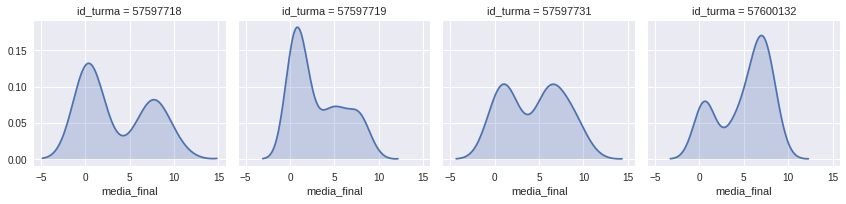

In [26]:
### 3
lp_i = turmas_imd_cons[turmas_imd_cons['codigo'].str.contains("IMD0030")]
id_lp_i = list(lp_i['id_turma'])
# turmas_lp = matricula_comp[matricula_comp['id_turma'] == (id_lp_i[0] | id_lp_i[1] | id_lp_i[2] | id_lp_i[3])]
turmas_lp1 = matricula_comp[matricula_comp['id_turma'] == id_lp_i[0]]
for i in range(len(id_lp_i)-1):
    turmas_lp1 = turmas_lp1.append(matricula_comp[matricula_comp['id_turma'] == id_lp_i[i+1]])
g = sns.FacetGrid(turmas_lp1,col='id_turma')
g.map(sns.kdeplot, 'media_final',shade=True)
sns.despine(left=True, bottom=True)
plt.show()

Valores 
Turma 1:  0.10828686025840682 
Turma 2:  -0.30834720120849757 
Turma 3:  -0.006498876397166866 
Turma 4:  1.22941393843774


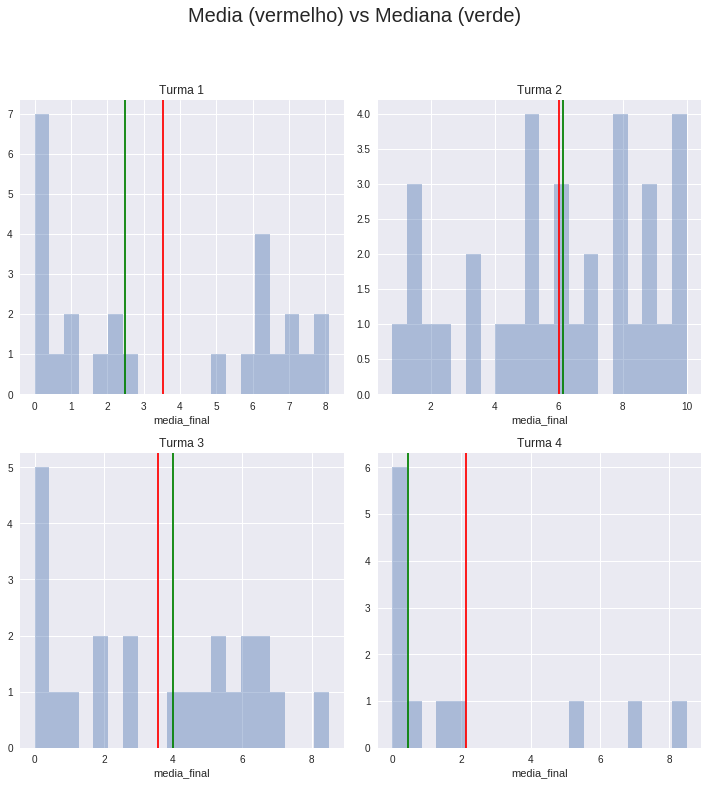

In [5]:
## 4
edb_1 = turmas_imd_cons[turmas_imd_cons['codigo'].str.contains("IMD0029")]
id_edb_1 = list(edb_1['id_turma'])

fig = plt.figure(figsize=(10,10))
# main title
plt.suptitle("Media (vermelho) vs Mediana (verde)", fontsize=20, y = 1.09)

skews = []

y_title_margin = 1
for i in range(len(id_edb_1)):
    turmas_edb_1 = matricula_comp[matricula_comp['id_turma'] == id_edb_1[i]].dropna()
    turmas_edb_1 = turmas_edb_1[~turmas_edb_1.duplicated('id_discente')]
    ### Creating a subplot
    ax_edb1 = fig.add_subplot(2,2,i+1)
    ### Title of the subplot
    ax_edb1.set_title("Turma " + str(i+1), y = y_title_margin, fontsize=12)
    # Plot the mean in red
    ax_edb1.axvline(turmas_edb_1['media_final'].mean(), color="r")
    # Plot the median in green
    ax_edb1.axvline(turmas_edb_1['media_final'].median(), color="g")
    sns.distplot(turmas_edb_1['media_final'], kde = False, ax=ax_edb1,bins=20)
    skews.append(skew(turmas_edb_1['media_final']))

fig.tight_layout()

print('Valores',
      '\nTurma 1: ', skews[0],
      '\nTurma 2: ', skews[1],
      '\nTurma 3: ', skews[2],
      '\nTurma 4: ', skews[3])
    
plt.show()